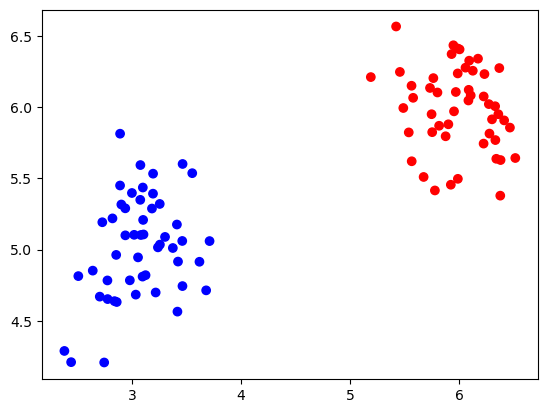

In [49]:
#######1. 2.

import matplotlib.pyplot as plt
import numpy as np
import math
import random

N1 = 50
N2 = 50
K = 2
sigma = 0.1

mean = (6, 6)
cov = [[sigma, 0], [0, sigma]]
x1 = np.random.multivariate_normal(mean, cov, N1)  # 生成100个满足分布的数据
c1 = ['red'] * len(x1)

mean = (3, 5)
cov = [[sigma, 0], [0, sigma]]
x2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(x2)

# mean = (8, 3)
# cov = [[sigma, 0], [0, sigma]]
# x3 = np.random.multivariate_normal(mean, cov, N3)
# c3 = ['blue'] * len(x3)

X = np.concatenate((x1, x2))
color = np.concatenate((c1, c2))
T = 0 * np.ones([len(X), K])  #200*2

for n in range(0, len(X)):
    if n < len(x1):
        T[n][0] = 1
    if N1 <= n < len(x1) + len(x2):
        T[n][1] = 1
T = T.astype(int)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()
##############


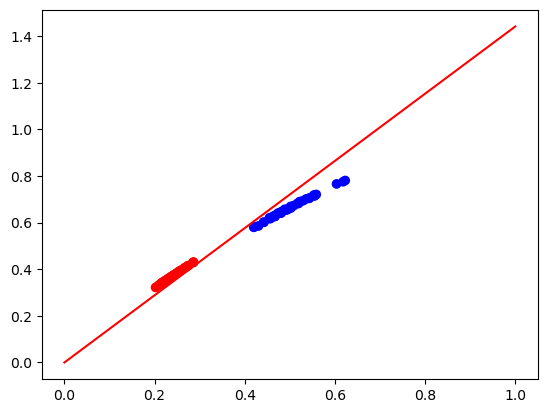

[[ 40.50955133]
 [-28.10430079]]


In [50]:
import matplotlib.pyplot as plt
import numpy as np

m = 2
miu = np.arange(m)
alpha = 100
s =5
n1 = 0
N = len(X)
omega = np.zeros((m, 1))
while n1 < n:
    faitry = np.zeros((N, m))
    for u in range(N):
        for v in range(m):
            faitry[u][v] = np.exp((-(X[u][0] - miu[v]) ** 2 - (X[u][1] - miu[v]) ** 2) / (2 * (s ** 2)))
    faisee = faitry.T  # n * m
    an = np.dot(omega.T, faisee)  # 1*n
    y = 1 / (1 + np.exp(-1 * an))  # 1*n
    rnn = np.zeros((N, N))
    for o in range(N):
        for q in range(N):
            if o == q:
                rnn[o][q] = y[0, o] * (1 - y[0, o])  # n*m

    ssninverse = np.linalg.inv(alpha * np.eye(m, m)) + np.dot(np.dot(faisee, rnn), faisee.T)
    ssn = np.linalg.inv(ssninverse)  # m*m
    ww = np.array(T[:, 1]).reshape(N, 1)
    xx = y.T - ww  # n*1
    ew_one = np.dot(np.linalg.inv(alpha * np.eye(m, m)), omega) + np.dot(faisee, xx)
    aaa = np.dot(ssn, ew_one)
    omega = omega - aaa  # m*1
    n1 += 1

xaxis = np.arange(0, 11)
yaxis = np.arange(0, 11)
p = np.zeros((11, 11))
fai = np.zeros((1, m))

for i in xaxis:
    for j in yaxis:
        for k in range(m):
            fai[0, k] = np.exp((-(i - miu[k]) ** 2 - (j - miu[k]) ** 2) / (2 * (s ** 2)))


def display(x, y_, x_ori, y_noise):
    fig, ax = plt.subplots()
    # line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line1, = ax.plot(x, y_, color='red')
    # ax.legend()
    # # ax.set_title('Linear and Quadratic Functions')
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')

    plt.scatter(x_ori, y_noise, marker='o', c=color)
    plt.show()


x_d = np.linspace(0, 1, 50)
k = -omega[0] / omega[1]
display(x_d, x_d * k, faitry[:, 0], faitry[:, 1])

print(omega)

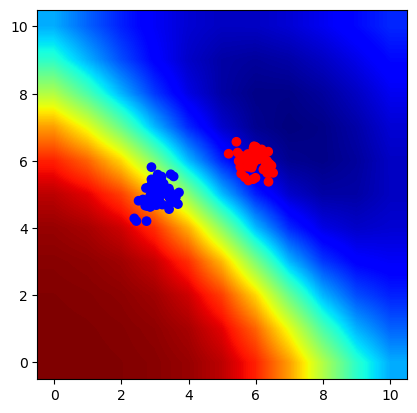

In [51]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
for i in xaxis:
    for j in yaxis:
        for k in range(m):
            fai[0, k] = np.exp((-(i - miu[k]) ** 2 - (j - miu[k]) ** 2) / (2 * (s ** 2)))
        a = np.dot(fai, omega)
        sigma = fai.dot(np.linalg.inv(ssninverse)).dot(np.transpose(fai))
        p[i, j] = 1 - 1 / (1 + np.exp(a / (1 + np.sqrt((np.pi / 8) * sigma))))
plt.imshow(p, interpolation='bilinear', origin='lower', cmap=plt.cm.jet)
plt.show()